In [10]:
import pandas

df_train = pandas.read_csv("../data/train_data_stg.csv", delimiter="|")
df_test = pandas.read_csv("../data/test_data_stg.csv", delimiter="|")

In [11]:
df_train = df_train.drop(['rank'],axis = 1)
df_test = df_test.drop(['rank'] ,axis = 1)

In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly_feat = PolynomialFeatures(degree=3)
X_train = poly_feat.fit_transform(df_train[['t']])

X_test = poly_feat.fit_transform(df_test[['t']])

In [14]:
import numpy as np
df_train['t'] = np.log(df_train['t'])
df_train['p'] = np.log(df_train['p'])

df_test['t'] = np.log(df_test['t'])
df_test['p'] = np.log(df_test['p'])

In [15]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=50)
rf_reg.fit(df_train[['t']], df_train['p'])

prediction = rf_reg.predict(df_test[['t']])

In [16]:
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

print("Mean Absolute Error (MAE): %.2f" % mean_absolute_error(df_test[['p']], prediction))
print("Root Mean Squarred Error (RMSE): %.2f" % root_mean_squared_error(df_test[['p']], prediction))
print("R2 Score %.2f" % r2_score(df_test[['p']], prediction))

Mean Absolute Error (MAE): 1.41
Root Mean Squarred Error (RMSE): 1.81
R2 Score 0.18


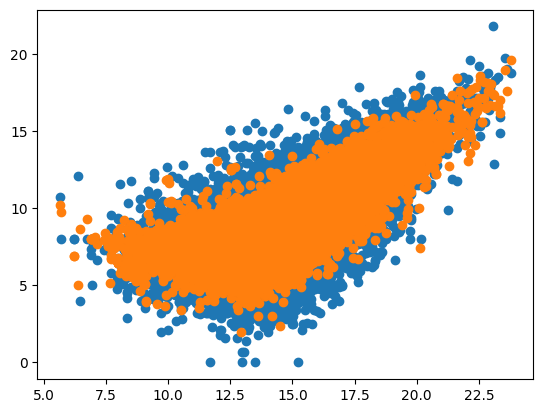

In [17]:
import matplotlib.pyplot as plt

plt.scatter(df_test['t'], df_test['p'])
plt.scatter(df_test['t'], prediction)
plt.show()